dataset link https://bit.ly/3kXTdox

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
%matplotlib inline


In [2]:
df=pd.read_csv('iris.csv')
print('--'*50,'\n First 5 rows of dataset')
print(df.head())
print('--'*50,'\n Columns of dataset')
print('Columns', df.columns)
print('--'*50,'\n Description of dataset')
print(df.describe())
print('--'*50,'\n Null values in dataset')
print(df.isnull().sum())

---------------------------------------------------------------------------------------------------- 
 First 5 rows of dataset
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
---------------------------------------------------------------------------------------------------- 
 Columns of dataset
Columns Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
---------------------------------------------------------------------------------------------------- 
 Description of dataset
               Id  SepalLengthCm  S

###### 1- There are no null values in the dataset
###### 2- Total data values are 150
###### 3- we have to remove ID columns
###### 4- Speces wil be our target and the remaining columns wil be our feature columns

In [3]:
# As we can see that out target is in given in string, we should encode it.
lbl_enc=LabelEncoder()
y=pd.DataFrame(lbl_enc.fit_transform(df['Species']), columns=['Species'])
x=df.drop(['Species', 'Id'], axis=1)
print(y.head())
print(x.head())
joblib.dump(lbl_enc,'iris_target_enc.pkl')

   Species
0        0
1        0
2        0
3        0
4        0
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


['iris_target_enc.pkl']

In [4]:
x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.85)

In [5]:
d_tree_clf=tree.DecisionTreeClassifier()
d_tree_clf.fit(x_train, y_train)
y_predicted=d_tree_clf.predict(x_test)
joblib.dump(d_tree_clf, 'iris_dtree_clf.pkl')

['iris_dtree_clf.pkl']

In [6]:

accuracy=round(accuracy_score(y_test, y_predicted)*100,2)
print(accuracy)

91.3


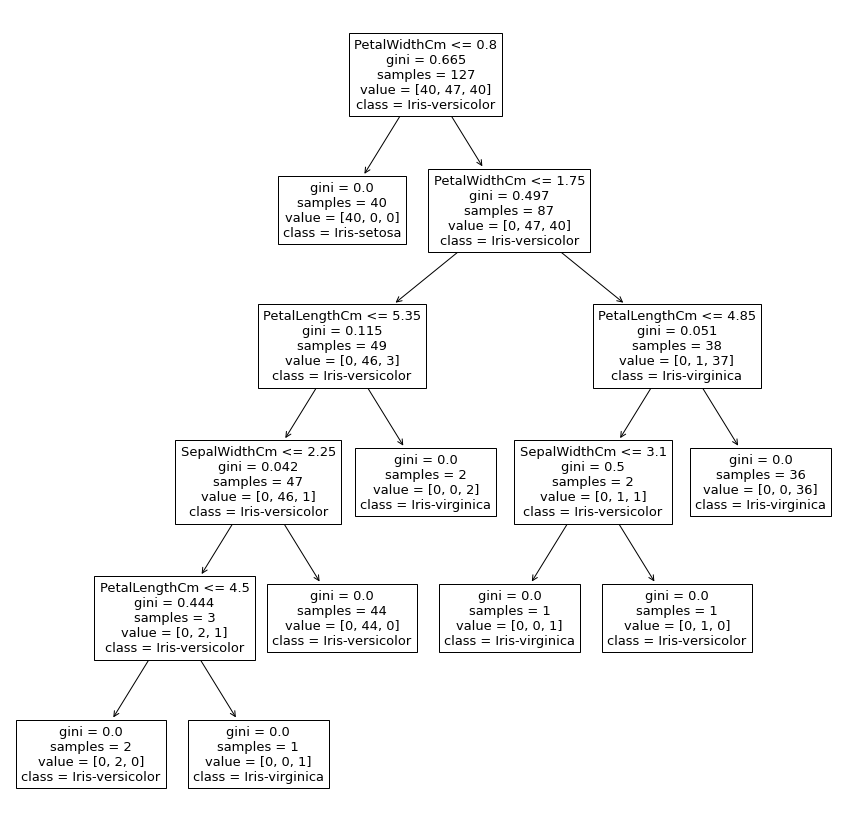

In [8]:
features=list(x.columns)
plt.figure(figsize=(15,15))
img=tree.plot_tree(d_tree_clf,feature_names=features,class_names=lbl_enc.classes_)[0]

In [1]:
import streamlit as st

st.image()